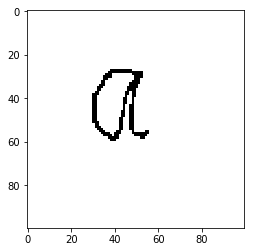

(53, 53)
	sparseMatrix.F[(53, 53)]	= 1
(39, 70)
	sparseMatrix.F[(39, 70)]	= 1
(43, 3)
	sparseMatrix.F[(43, 3)]	= 1
(63, 76)
	sparseMatrix.F[(63, 76)]	= 1
(29, 44)
	sparseMatrix.F[(29, 44)]	= 1


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

def RGBtoBW(image,threshold=120):
    img2=np.zeros(image.shape[0:2])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if((sum(image[i,j,:])/3)>threshold):
                img2[i,j]=1
            else:
                img2[i,j]=0
    return img2

def getHistogram(image):
    myHistogram={}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] in myHistogram.keys():
                myHistogram[image[i,j]]+=1
            else:
                myHistogram[image[i,j]]=1
    return myHistogram

class myMatrix():
    def __init__(self,d,f):
        self.D=d
        self.F=f

def create_D_F(image):
    d=set()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]==1:
                d.add((i,j))
    f={}
    for i,j in d:
        f[(i,j)]=1
    
    return myMatrix(d,f)    
    
img1=plt.imread("a1.jpg")
img2=RGBtoBW(img1)
plt.imshow(img2,plt.cm.binary_r)
plt.show()

myHistogram=getHistogram(img2)
black=myHistogram[0.0]
white=myHistogram[1.0]
if((black/white)<((black+white)*20/100)):      #black's are little than %20 of image
    sparseMatrix=create_D_F(img2)
    for i in range(0,5):
        print(list(sparseMatrix.D)[i])
        print('\tsparseMatrix.F[' + str(list(sparseMatrix.D)[i]) + ']\t= ' + str(sparseMatrix.F[list(sparseMatrix.D)[i]]))
